In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("data.csv")
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


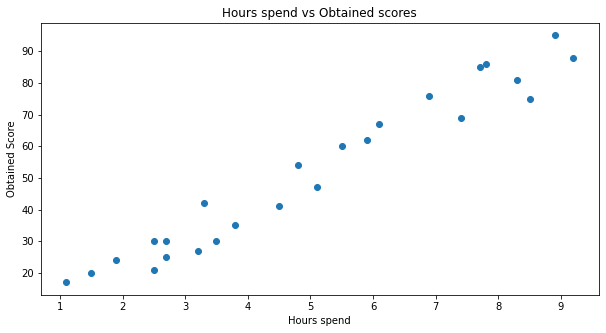

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel("Hours spend")
plt.ylabel("Obtained Score")
plt.title("Hours spend vs Obtained scores")
plt.scatter(data['Hours'], data['Scores'])



In [8]:
X = data.iloc[:, :-1].values # converting input df col to numpy array
y = data.iloc[:, 1].values # converting output df col to numpy array

print("Input shape: ", X.shape)
print("output shape: ", y.shape)

Input shape:  (25, 1)
output shape:  (25,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    shuffle=True,
                                                    random_state=0                                                
                                                    )

In [11]:
print(X_train.shape,
      y_train.shape,
      X_test.shape,
      y_test.shape)

(20, 1) (20,) (5, 1) (5,)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [13]:
r_sq = model.score(X_train, y_train)
print("Coefficent of Determination: ", r_sq) 

0.9515510725211552


In [16]:
#general equation is linear regression for one input feature y = m*x + c

print("slope: ", model.coef_[0])
print("intercept: ", model.intercept_)


slope:  9.91065648064224
intercept:  2.018160041434662


In [17]:
y_pred = model.predict(X_test)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [23]:
#sorting
y_pred.sort()
y_test.sort()

y_pred
y_test

array([20, 27, 30, 62, 69])

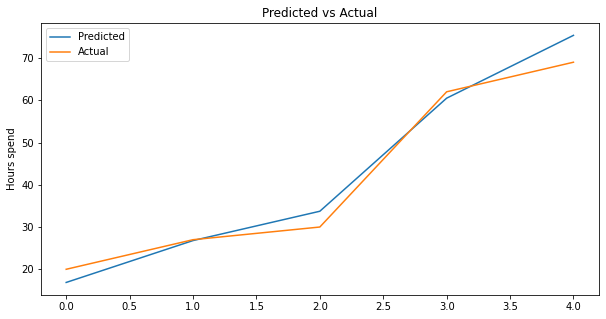

In [27]:

plt.figure(figsize=(10,5))
plt.title("Predicted vs Actual")
plt.ylabel("Hours spend")
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['Predicted', 'Actual'])